<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/dataset1/dataset1_clustered_decisiontrees_all_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

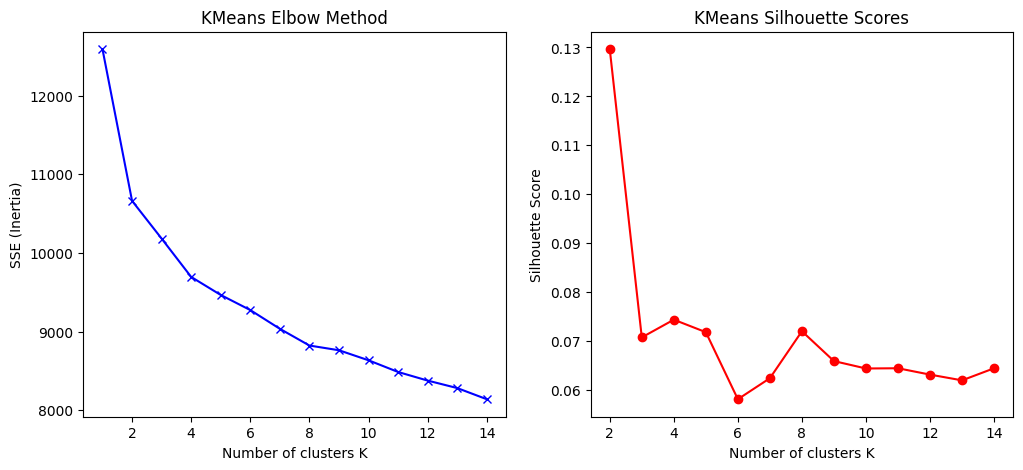

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import pandas as pd
df = pd.read_csv("/content/modified_processed_all_dataset1.csv")
X = df




# -------------------------
# 2. KMeans ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
# -------------------------

sse = []
sil_scores = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    if k > 1:
        labels = kmeans.labels_
        sil_scores.append(silhouette_score(X, labels))
    else:
        sil_scores.append(np.nan)  # k=1ÏùÄ Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞ Î∂àÍ∞Ä

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, sse, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('SSE (Inertia)')
plt.title('KMeans Elbow Method')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, 'ro-')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Scores')
plt.show()



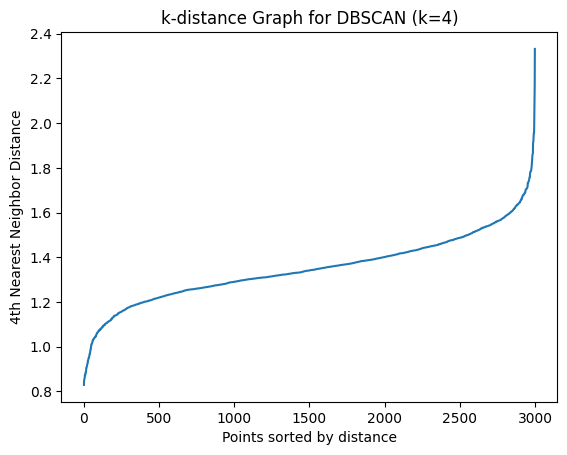

DBSCAN clusters found: 0


In [ ]:
# -------------------------
# 3. DBSCAN ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
# -------------------------

# eps Í≤∞Ï†ï ÏúÑÌï¥ k-distance Í∑∏ÎûòÌîÑ (min_samples=4 Í∏∞Ï§Ä)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 3])  # 4Î≤àÏß∏ Ïù¥ÏõÉ Í±∞Î¶¨
plt.plot(distances)
plt.title("k-distance Graph for DBSCAN (k=4)")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

# Ïó¨Í∏∞ÏÑú Ï†ÅÎãπÌïú eps Î≤îÏúÑ ÌôïÏù∏ ÌõÑ ÏòàÏãúÎ°ú eps=0.5 ÏÑ§Ï†ï
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò (ÎÖ∏Ïù¥Ï¶à Ï†úÏô∏)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN clusters found: {n_clusters_dbscan}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

'''
k=6
'''
# 1. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò
print("KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî ÌäπÏßï (ÌèâÍ∑†, Î∂ÑÏÇ∞)
kmeans_df = pd.DataFrame(X)
kmeans_df['cluster'] = kmeans_labels
print("KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Î∞è Î∂ÑÏÇ∞:")
print(kmeans_df.groupby('cluster').agg(['mean', 'var']))

KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉòÌîå Ïàò:
0    491
1    503
2    402
3    480
4    315
5    809
Name: count, dtype: int64
KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Î∞è Î∂ÑÏÇ∞:
              Age           Exercise Level           Sleep Hours            \
             mean       var           mean       var        mean       var   
cluster                                                                      
0        0.509475  0.089982       0.497963  0.169384   -0.176533  0.137094   
1        0.503674  0.083335       0.471173  0.162016    1.283437  0.222929   
2        0.502866  0.086337       0.468905  0.162996   -0.966790  0.313728   
3        0.512183  0.080609       0.475000  0.162213   -1.287202  0.250902   
4        0.499724  0.081821       0.512698  0.170220    1.092091  0.270615   
5        0.501935  0.087459       0.504944  0.171386    0.128067  0.106557   

        Stress Level           Work Hours per Week            ...  \
                mean       var                mean       var  ...   
cl

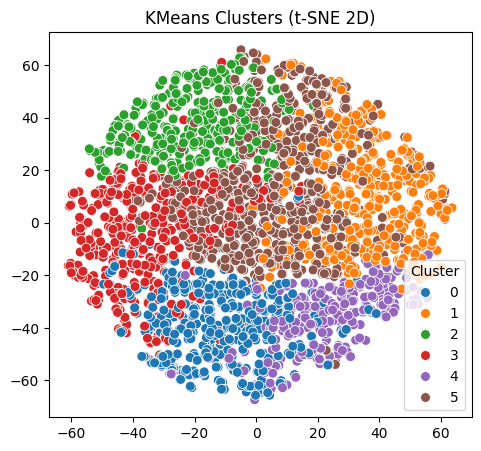

In [ ]:
# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÍ∞ÅÌôî (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='tab10', s=50)
plt.title('KMeans Clusters (t-SNE 2D)')
plt.legend(title='Cluster')


plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(X, labels, method_name=""):
    """
    ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÏóê ÎåÄÌïú ÎÇ¥Î∂Ä ÌèâÍ∞Ä ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† ÎîïÏÖîÎÑàÎ¶¨Î°ú Î∞òÌôòÌï©ÎãàÎã§.

    Parameters:
        X (ndarray): ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ (scalingÎêú Í≤É)
        labels (ndarray): ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÎùºÎ≤®
        method_name (str): Î∞©Î≤ï Ïù¥Î¶Ñ (Ïòà: "KMeans", "GMM", "DBSCAN")

    Returns:
        dict: method Ïù¥Î¶ÑÍ≥º ÎÇ¥Î∂Ä ÌèâÍ∞Ä ÏßÄÌëúÎì§ (Silhouette, Calinski, Davies)
    """
    # Ïú†Ìö®Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò ÌôïÏù∏
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters <= 1:
        # ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä 1Í∞ú Ïù¥ÌïòÏù¥Î©¥ ÌèâÍ∞ÄÌï† Ïàò ÏóÜÏùå
        return {
            "method": method_name,
            "n_clusters": n_clusters,
            "silhouette": None,
            "calinski": None,
            "davies": None
        }

    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)

    return {
        "method": method_name,
        "n_clusters": n_clusters,
        "silhouette": silhouette,
        "calinski": calinski,
        "davies": davies
    }


In [ ]:
results = []

# KMeans
results.append(evaluate_clustering(X, kmeans_labels, method_name="KMeans"))


# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df[["method", "n_clusters", "silhouette", "calinski", "davies"]]
results_df


method  n_clusters  silhouette    calinski    davies
0  KMeans           6    0.058115  214.094123  3.080568

<ipython-input-7-3839571073>:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


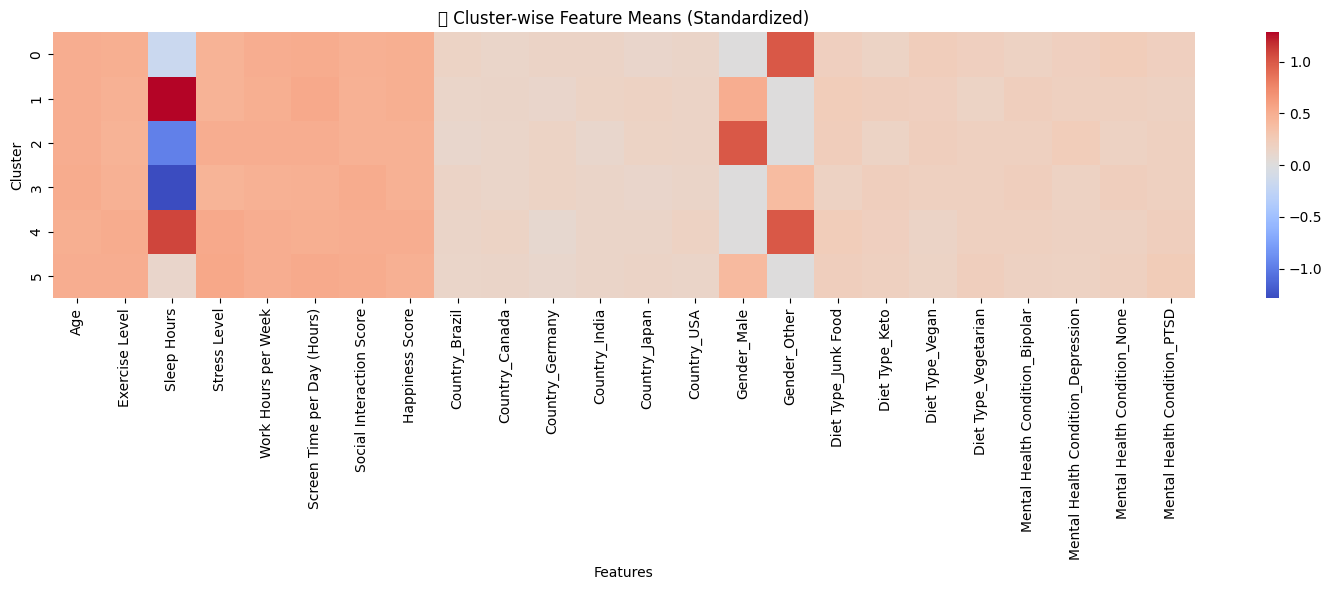

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏Í∞Ä Îã¥Í∏¥ Series ÎòêÎäî Î∞∞Ïó¥ÏùÑ Í∞ÄÏßÑ ÏÉÅÌÉúÎùºÍ≥† Í∞ÄÏ†ï (Ïòà: kmeans_labels)
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
# feature_namesÎ•º Ï†ïÏùò (XÍ∞Ä ÏõêÎûò DataFrameÏùº Í≤ΩÏö∞)
feature_names = X.columns

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ìè¨Ìï®Ìïú ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞
clustered_df = pd.DataFrame(X, columns=feature_names)
clustered_df["cluster"] = kmeans_labels
clustered_df = pd.DataFrame(X, columns=feature_names)  # feature_namesÎäî ÌîºÏ≤ò Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
clustered_df["cluster"] = kmeans_labels  # KMeans Íµ∞Ïßë Í≤∞Í≥º

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í ÌôïÏù∏
cluster_means = clustered_df.groupby("cluster").mean()

# ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 6))
sns.heatmap(cluster_means, cmap="coolwarm", center=0, annot=False)
plt.title("üìä Cluster-wise Feature Means (Standardized)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


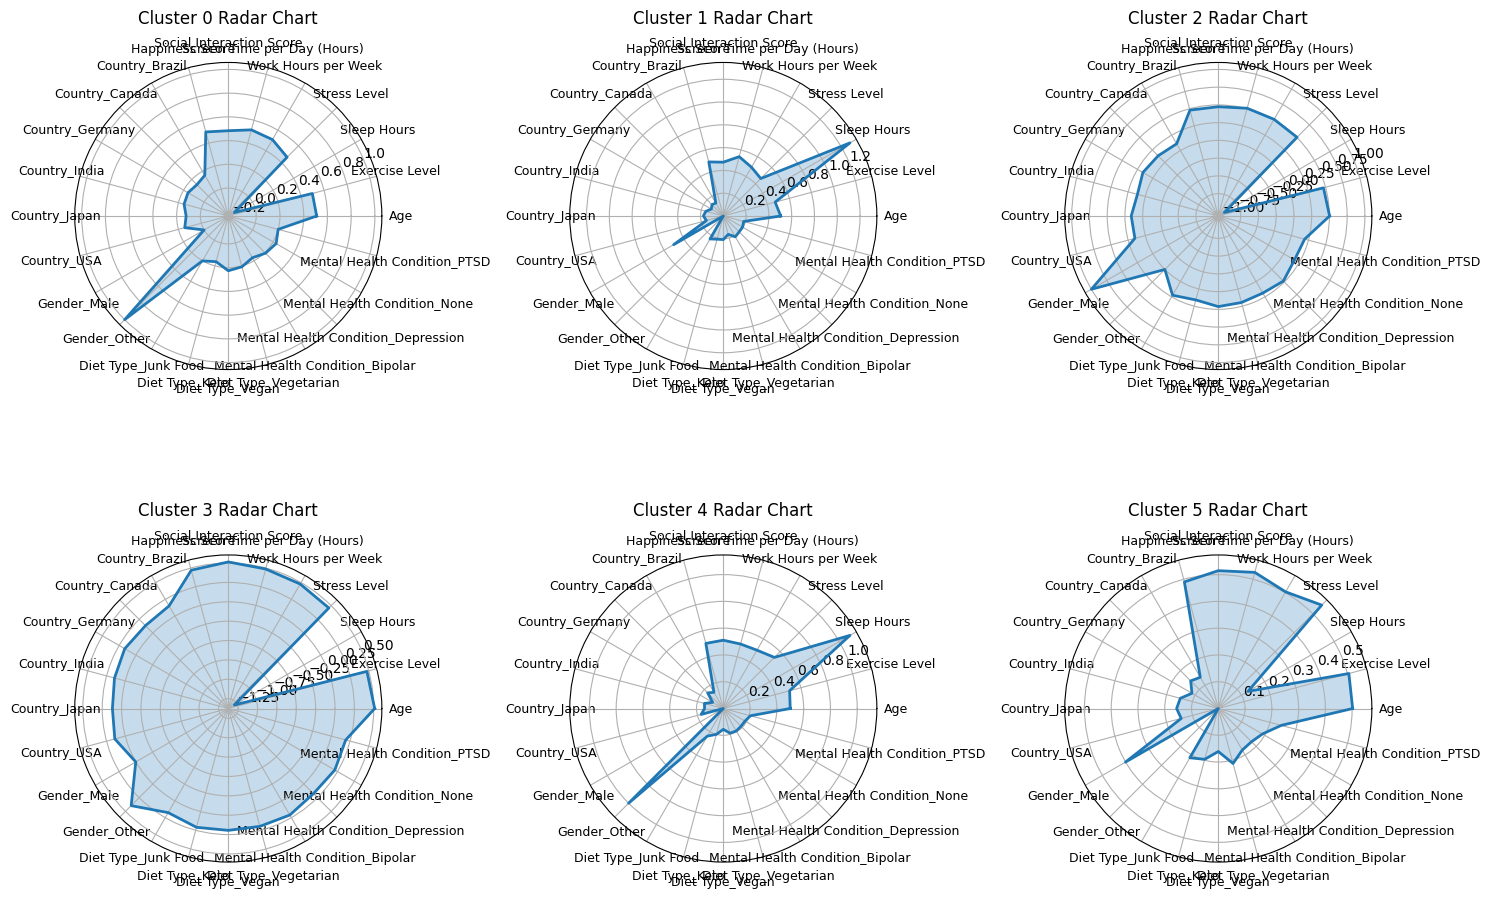

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
cluster_means = clustered_df.groupby("cluster").mean()

labels = cluster_means.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += [angles[0]]  # Îã´Í∏∞ ÏúÑÌï¥ Ï≤òÏùå Í∞ÅÎèÑ Ï∂îÍ∞Ä

num_clusters = len(cluster_means)
cols = 3  # Ìïú ÌñâÏóê 3Í∞úÏî© Î∞∞Ïπò (ÏõêÌïòÎäî ÏàòÎ°ú Î≥ÄÍ≤Ω Í∞ÄÎä•)
rows = (num_clusters + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), subplot_kw=dict(polar=True))
axs = axs.flatten()  # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì§Ïñ¥ÏÑú Ïù∏Îç±Ïã± Ìé∏ÌïòÍ≤å

for i, (cluster_id, row) in enumerate(cluster_means.iterrows()):
    values = row.values
    values = np.concatenate((values, [values[0]]))  # Îã´Í∏∞ ÏúÑÌï¥ Ï≤òÏùåÍ∞í Ï∂îÍ∞Ä

    ax = axs[i]
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f"Cluster {cluster_id} Radar Chart", y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)

# ÎÇ®ÏùÄ subplotÏùÄ ÏÇ≠Ï†ú (ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ≥¥Îã§ ÎßéÏùÑ Í≤ΩÏö∞)
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [ ]:
for cluster_id, data in clustered_df.groupby("cluster"):
    print(f"\nCluster {cluster_id} Summary:")
    print(data.describe().round(3))



Cluster 0 Summary:
           Age  Exercise Level  Sleep Hours  Stress Level  \
count  491.000         491.000      491.000       491.000   
mean     0.509           0.498       -0.177         0.465   
std      0.300           0.412        0.370         0.399   
min      0.000           0.000       -0.918         0.000   
25%      0.250           0.000       -0.451         0.000   
50%      0.478           0.500       -0.184         0.500   
75%      0.783           1.000        0.149         1.000   
max      1.000           1.000        0.550         1.000   

       Work Hours per Week  Screen Time per Day (Hours)  \
count              491.000                      491.000   
mean                 0.508                        0.516   
std                  0.295                        0.291   
min                  0.000                        0.000   
25%                  0.256                        0.267   
50%                  0.538                        0.533   
75%              

| Íµ∞Ïßë     | Ï£ºÏöî ÌäπÏÑ±                                | ÌñâÎ≥µÎèÑ            |
| ------ | ------------------------------------ | -------------- |
| **0Î≤à** | ÎÇÆÏùÄ ÏàòÎ©¥ (ÏµúÏ†Ä ÏàòÏ§Ä), ÌèâÍ∑† Ïö¥ÎèôÎüâ, ÎÇÆÏùÄ Ïä§Ìä∏Î†àÏä§       | **0.498**      |
| **1Î≤à** | ÏàòÎ©¥ Îß§Ïö∞ ÎÜíÏùå, ÌèâÍ∑† Ïö¥Îèô, ÎÇÆÏùÄ Ïä§Ìä∏Î†àÏä§             | **0.491**      |
| **2Î≤à** | ÏàòÎ©¥ Îß§Ïö∞ Î∂ÄÏ°±, ÌèâÍ∑† Ïö¥Îèô, ÎÜíÏùÄ Ïä§Ìä∏Î†àÏä§             | **0.479**      |
| **3Î≤à** | ÏàòÎ©¥ ÏµúÏ†Ä ÏàòÏ§Ä, ÌèâÍ∑† Ïö¥Îèô, Ïä§Ìä∏Î†àÏä§ ÎÇÆÏùå             | **0.471**      |
| **4Î≤à** | ÏàòÎ©¥ ÎßéÏùå, Ïö¥ÎèôÎüâ ÎÜíÏùå, Ïä§Ìä∏Î†àÏä§ ÏïΩÍ∞Ñ ÎÜíÏùå            | **0.503** (ÏµúÍ≥†) |
| **5Î≤à** | ÌèâÍ∑† ÏàòÎ©¥¬∑Ïö¥Îèô, Ïä§Ìä∏Î†àÏä§ Í∞ÄÏû• ÎÜíÏùå, PTSD ÎπÑÏú®ÎèÑ Í∞ÄÏû• ÎÜíÏùå | **0.490**      |


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = clustered_df.columns.drop(['Happiness Score', 'cluster'])

models_by_cluster = {}

for cluster_id in sorted(clustered_df['cluster'].unique()):
    cluster_data = clustered_df[clustered_df['cluster'] == cluster_id]
    X_cluster = cluster_data[features]
    y_cluster = cluster_data['Happiness Score']

    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n[Cluster {cluster_id}] Best Params: {grid_search.best_params_}")
    print(f"R¬≤ Score: {r2_score(y_test, y_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

    models_by_cluster[cluster_id] = best_model


[Cluster 0] Best Params: {'max_depth': 3, 'min_samples_split': 2}
R¬≤ Score: -0.165
Mean Squared Error: 0.097

[Cluster 1] Best Params: {'max_depth': 3, 'min_samples_split': 2}
R¬≤ Score: -0.126
Mean Squared Error: 0.088

[Cluster 2] Best Params: {'max_depth': 3, 'min_samples_split': 10}
R¬≤ Score: -0.204
Mean Squared Error: 0.099

[Cluster 3] Best Params: {'max_depth': 3, 'min_samples_split': 2}
R¬≤ Score: -0.212
Mean Squared Error: 0.098

[Cluster 4] Best Params: {'max_depth': 3, 'min_samples_split': 2}
R¬≤ Score: -0.079
Mean Squared Error: 0.068

[Cluster 5] Best Params: {'max_depth': 3, 'min_samples_split': 10}
R¬≤ Score: -0.114
Mean Squared Error: 0.083
